# Quick start

In [1]:
import xbitinfo as xb

import xarray as xr

xr.set_options(display_style="text")

import matplotlib.pyplot as plt
import numcodecs

In [7]:
plt.rcParams['figure.figsize'] = [10.0,5.0]
plt.rcParams['figure.dpi'] = 200

In [4]:
ds = xr.tutorial.load_dataset("eraint_uvz")

ds

<xarray.Dataset>
Dimensions:    (longitude: 480, latitude: 241, level: 3, month: 2)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.2 -178.5 ... 177.8 178.5 179.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * level      (level) int32 200 500 850
  * month      (month) int32 1 7
Data variables:
    z          (month, level, latitude, longitude) float32 1.068e+05 ... 1.17...
    u          (month, level, latitude, longitude) float32 1.282 1.282 ... 3.539
    v          (month, level, latitude, longitude) float32 -0.04676 ... 3.383
Attributes:
    Conventions:  CF-1.0
    Info:         Monthly ERA-Interim data. Downloaded and edited by fabien.m...

<AxesSubplot:title={'center':'Statistical distributions'}, xlabel='value', ylabel='Probability density'>

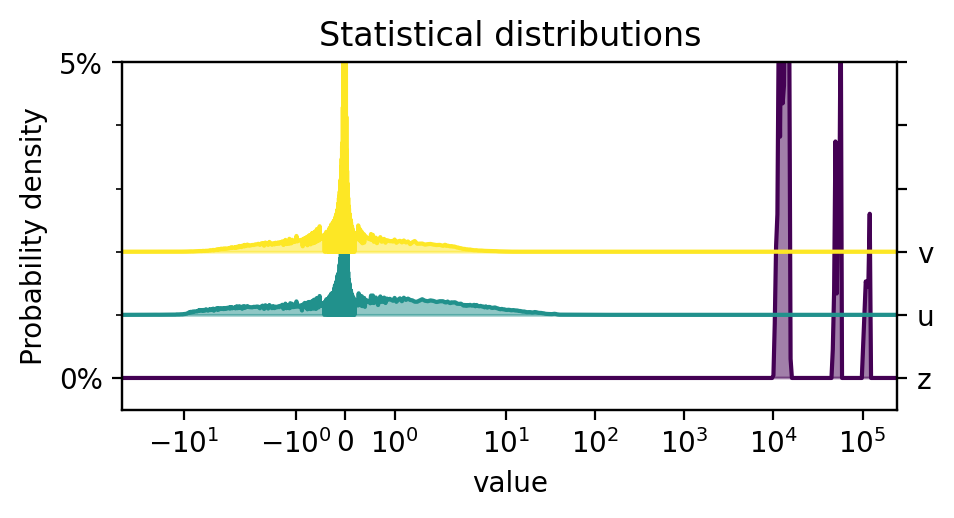

In [8]:
xb.plot_distribution(ds)

## Get information content per bit

using {py:func}`xbitinfo.xbitinfo.get_bitinformation`

In [9]:
info_per_bit = xb.get_bitinformation(ds, dim="longitude")

info_per_bit

  0%|          | 0/3 [00:00<?, ?it/s]

<xarray.Dataset>
Dimensions:  (bit32: 32)
Coordinates:
  * bit32    (bit32) <U3 '±' 'e1' 'e2' 'e3' 'e4' ... 'm20' 'm21' 'm22' 'm23'
    dim      <U9 'longitude'
Data variables:
    z        (bit32) float64 0.0 0.0 0.0 0.0 ... 0.008817 0.07362 0.03548
    u        (bit32) float64 0.7816 0.4274 0.0 0.0 ... 0.06807 0.09653 0.14
    v        (bit32) float64 0.8752 0.7753 0.0 0.0 ... 0.03571 0.08528 0.02338
Attributes:
    xbitinfo_description:       bitinformation calculated by xbitinfo.get_bit...
    python_repository:          https://github.com/observingClouds/xbitinfo
    julia_repository:           https://github.com/milankl/BitInformation.jl
    reference_paper:            http://www.nature.com/articles/s43588-021-001...
    xbitinfo_version:           0.0.0
    BitInformation.jl_version:  0.5.1

## Visualize information content

using {py:func}`xbitinfo.graphics.plot_bitinformation`

/Users/aengenheyster/Applications/miniconda3/envs/test_xbitinfo/lib/python3.10/site-packages/xbitinfo/graphics.py:320: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


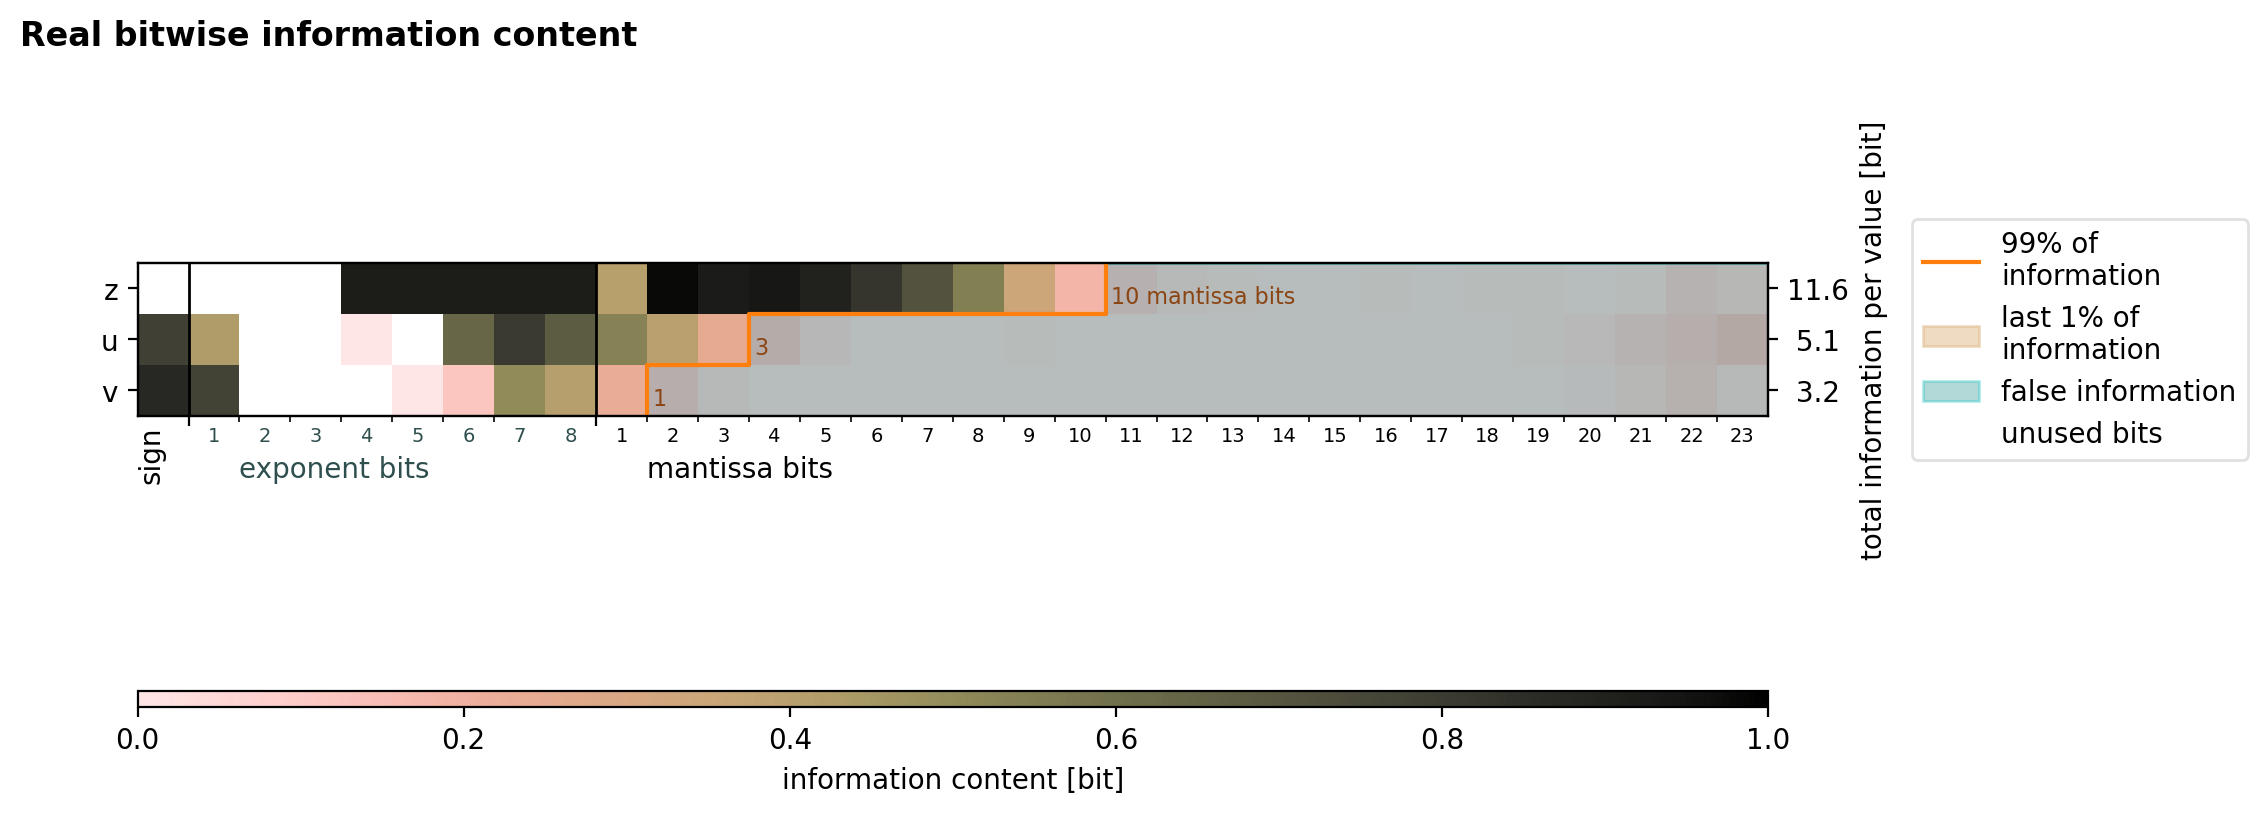

In [10]:
fig = xb.plot_bitinformation(info_per_bit)

## Get keepbits

using {py:func}`xbitinfo.xbitinfo.get_keepbits`

In [11]:
keepbits = xb.get_keepbits(info_per_bit, 0.99)
keepbits

<xarray.Dataset>
Dimensions:   (inflevel: 1)
Coordinates:
    dim       <U9 'longitude'
  * inflevel  (inflevel) float64 0.99
Data variables:
    z         (inflevel) int64 10
    u         (inflevel) int64 3
    v         (inflevel) int64 1

## Apply bitrounding

using {py:func}`xbitinfo.bitround.xr_bitround` or {py:func}`xbitinfo.bitround.jl_bitround` (does not work for chunked data)

In [12]:
ds_bitrounded = xb.xr_bitround(ds, keepbits)

## Save compressed

using {py:class}`xbitinfo.save_compressed.ToCompressed_Netcdf` or  {py:class}`xbitinfo.save_compressed.ToCompressed_Zarr`

In [13]:
ds_bitrounded

<xarray.Dataset>
Dimensions:    (longitude: 480, latitude: 241, level: 3, month: 2)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.2 -178.5 ... 177.8 178.5 179.2
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * level      (level) int32 200 500 850
  * month      (month) int32 1 7
Data variables:
    z          (month, level, latitude, longitude) float32 1.068e+05 ... 1.17...
    u          (month, level, latitude, longitude) float32 1.25 1.25 ... 3.5 3.5
    v          (month, level, latitude, longitude) float32 -0.04688 ... 3.0
Attributes:
    Conventions:  CF-1.0
    Info:         Monthly ERA-Interim data. Downloaded and edited by fabien.m...

### NetCDF

In [14]:
if not os.path.exists('tmp'):
    print('Making temporary directory')
    os.system('mkdir tmp')

Making temporary directory


In [15]:
ds_bitrounded.to_compressed_netcdf("tmp/bitrounded_compressed.nc")
ds.to_compressed_netcdf("tmp/compressed.nc")
ds.to_netcdf("tmp/original.nc")

In [16]:
!du -hs tmp/*.nc

488K	tmp/bitrounded_compressed.nc
3.9M	tmp/compressed.nc
4.0M	tmp/original.nc


!rm *.nc

### Zarr

In [17]:
ds_bitrounded.to_compressed_zarr("tmp/bitrounded_compressed.zarr", mode="w")
ds.to_compressed_zarr("tmp/compressed.zarr", mode="w")
ds.to_zarr("tmp/original.zarr", mode="w");

In [18]:
!du -hs tmp/*.zarr

804K	tmp/bitrounded_compressed.zarr
4.5M	tmp/compressed.zarr
2.8M	tmp/original.zarr


In [19]:
ds_bitrounded.to_compressed_zarr(
    "tmp/bitrounded_compressed_zlib.zarr", mode="w",
    compressor=numcodecs.Blosc('zlib')
    )
ds.to_compressed_zarr(
    "tmp/compressed_zlib.zarr", mode="w",
    compressor=numcodecs.Blosc('zlib')
    )
ds_bitrounded.to_compressed_zarr(
    "tmp/bitrounded_compressed_zstd.zarr", mode="w",
    compressor=numcodecs.Blosc('zstd')
    )
ds.to_compressed_zarr(
    "tmp/compressed_zstd.zarr", mode="w",
    compressor=numcodecs.Blosc('zstd')
    )

In [20]:
!du -hs xbitinfo/*.zarr

804K	xbitinfo/bitrounded_compressed.zarr
664K	xbitinfo/bitrounded_compressed_zlib.zarr
632K	xbitinfo/bitrounded_compressed_zstd.zarr
4.5M	xbitinfo/compressed.zarr
4.1M	xbitinfo/compressed_zlib.zarr
4.3M	xbitinfo/compressed_zstd.zarr
2.8M	xbitinfo/original.zarr


!rm -r *.zarr